simple linear regression


data Ingestion

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
path= r"D:\ETL HIVE\datasets\50_Startups.csv"

In [12]:
df=pd.read_csv(path)

In [13]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
df.tail()

,RND,ADMIN,MKT,STATE,PROFIT
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [18]:
df.isnull().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

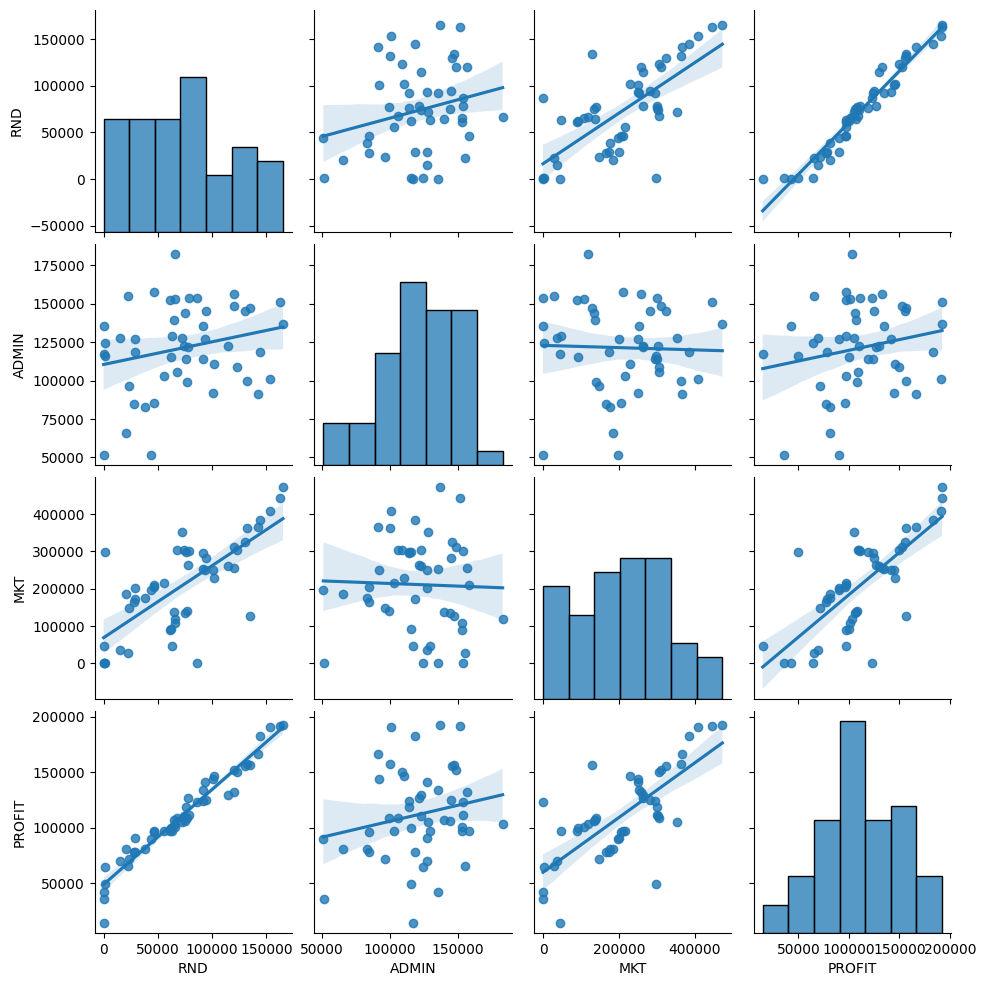

In [23]:
sns.pairplot(df , kind="reg")

<Axes: xlabel='RND', ylabel='PROFIT'>

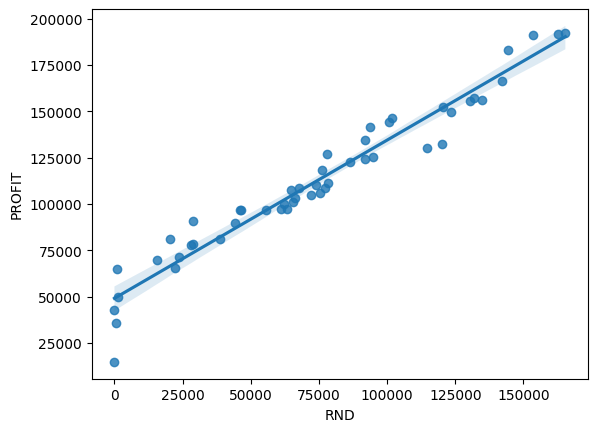

In [25]:
sns.regplot(df ,x="RND", y="PROFIT")

In [ ]:
#seperate x & y
#USE DOUBLE SQUARE BRACKETS
x=df[["RND"]]
y=df[["PROFIT"]]

In [29]:
    y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [31]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=34)

In [46]:
x_train.head()

,RND
9,123334.88
37,44069.95
48,542.05
47,0.00
22,73994.56


In [37]:
x_train.shape

(42, 1)

In [43]:
x_test.head()

,RND
16,78013.11
39,38558.51
1,162597.70
3,144372.41
0,165349.20


In [44]:
print(y_train.head())
print(y_train.shape())
print(y_test.head())
print(y_test.shape())



       PROFIT
9   149759.96
37   89949.14
48   35673.41
47   42559.73
22  110352.25


TypeError: 'tuple' object is not callable

In [48]:
from sklearn.linear_model import LinearRegression

In [50]:
model=LinearRegression()

In [52]:
model.fit(x_train, y_train)

LinearRegression()

In [55]:
#training score
model.score(x_train, y_train)

0.9300367196419655

In [57]:
#testing score
model.score(x_test, y_test)

0.9592157645546188

In [61]:
from sklearn.metrics import mean_squared_error, \
    root_mean_squared_error, mean_absolute_percentage_error, r2_score

In [62]:
y_test_pred=model.predict(x_test)
(y_test_pred)

array([[114923.33595397],
       [ 81827.56382264],
       [185875.57768146],
       [170587.62532946],
       [188183.62330908],
       [158781.67206184],
       [101486.40012554],
       [128219.35643258],
       [104889.57418808],
       [162403.18564697]])

In [ ]:
# create function evaluate
def evaluate(model  ,  x, y):
    y_pred  =  model.predict(x)
    MSE  =  mean_squared_error(y ,  y_pred)
    MAE  =  mean_absolute_error(y , y_pred)
    RMSE  =  root_mean_squared_error(y , y_pred)
    r2_score_ =  r2_score(y , y_pred)
    MAPE  =  mean_absolute_percentage_error(y , y_pred)
 
 
 
    print(f"MSE -->{MSE}")
    print(f"RMSE -->{RMSE}")
    print(f"MAPE -->{MAPE}")
    print(f"MAE -->{MAE}")
    print(f"r2_score_ -->{r2_score_}")
 
 